In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)


In [ ]:
# Download latest version
path = kagglehub.dataset_download("fanconic/skin-cancer-malignant-vs-benign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/skin-cancer-malignant-vs-benign


In [ ]:
test = os.path.join(path, 'test')
print("Test files:", os.listdir(test))

Test files: ['benign', 'malignant']


In [ ]:
# Set the path to your test directory
TEST_DATA_DIR = os.path.join(path, 'test')

# Create the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load test images
test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Get the true labels
test_labels = test_generator.classes
print("Class indices:", test_generator.class_indices)  # {'benign': 0, 'malignant': 1}

Found 660 images belonging to 2 classes.
Class indices: {'benign': 0, 'malignant': 1}


In [ ]:
# Directory where your models are saved
MODEL_DIR = '/content/SkinCancerModels'

# Initialize a dictionary to store evaluation metrics across models
model_metrics = {
    'accuracy': [], 'precision': [], 'recall': [], 'f1': [],
    'auc': [], 'ap': [],  # Average precision
    'specificity': [], 'npv': [],  # Negative Predictive Value
    'fnr': [], 'fpr': []   # False Negative Rate, False Positive Rate
}

# Lists to store ROC and PR curve data for plotting
roc_curves = []
pr_curves = []

for model_num in range(1, 8):  # 1 to 7 inclusive
    print(f"\nEvaluating Model {model_num}")
    model_path = f"{MODEL_DIR}/model{model_num}.h5"
    model = load_model(model_path)

    # Each saved model is loaded, evaluated on the same test data, and compared.

    # Predict
    test_generator.reset()
    probabilities = model.predict(test_generator)
    predictions = (probabilities > 0.5).astype(int)

    # Converts predicted probabilities into class predictions using the 0.5 threshold.

    # Metrics
    cm = confusion_matrix(test_labels, predictions)
    tn, fp, fn, tp = cm.ravel()

    # Extract true/false positives/negatives for further metric calculations.

    model_metrics['accuracy'].append(accuracy_score(test_labels, predictions))
    model_metrics['precision'].append(precision_score(test_labels, predictions))
    model_metrics['recall'].append(recall_score(test_labels, predictions))
    model_metrics['f1'].append(f1_score(test_labels, predictions))
    model_metrics['auc'].append(roc_auc_score(test_labels, probabilities))
    model_metrics['ap'].append(average_precision_score(test_labels, probabilities))
    model_metrics['specificity'].append(tn / (tn + fp))
    model_metrics['npv'].append(tn / (tn + fn))
    model_metrics['fnr'].append(fn / (fn + tp))
    model_metrics['fpr'].append(fp / (fp + tn))

    # ROC/PR curves
    fpr, tpr, _ = roc_curve(test_labels, probabilities)
    precision, recall, _ = precision_recall_curve(test_labels, probabilities)
    roc_curves.append((fpr, tpr))
    pr_curves.append((precision, recall))

    print(f"Confusion Matrix for Model {model_num}:\n{cm}")

# You can now use the rest of the previous code for plotting and summary as before.


Evaluating Model 1


21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 648ms/step
Confusion Matrix for Model 1:
[[279  81]
 [ 67 233]]

Evaluating Model 2


21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 657ms/step
Confusion Matrix for Model 2:
[[306  54]
 [115 185]]

Evaluating Model 3


21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 652ms/step
Confusion Matrix for Model 3:
[[335  25]
 [168 132]]

Evaluating Model 4


21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 651ms/step
Confusion Matrix for Model 4:
[[322  38]
 [157 143]]

Evaluating Model 5


21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 742ms/step
Confusion Matrix for Model 5:
[[345  15]
 [190 110]]

Evaluating Model 6


21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 665ms/step
Confusion Matrix for Model 6:
[[337  23]
 [161 139]]

Evaluating Model 7


21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 443ms/step
Confusion Matrix for Model 7:
[[360   0]
 [275  25]]



Comprehensive Metrics Summary:
         accuracy  precision    recall        f1       auc        ap  \
Model 1  0.775758   0.742038  0.776667  0.758958  0.864343  0.803304   
Model 2  0.743939   0.774059  0.616667  0.686456  0.856861  0.806186   
Model 3  0.707576   0.840764  0.440000  0.577681  0.850074  0.801572   
Model 4  0.704545   0.790055  0.476667  0.594595  0.847704  0.792764   
Model 5  0.689394   0.880000  0.366667  0.517647  0.865046  0.818127   
Model 6  0.721212   0.858025  0.463333  0.601732  0.875148  0.831762   
Model 7  0.583333   1.000000  0.083333  0.153846  0.827454  0.799861   

         specificity       npv       fnr       fpr  
Model 1     0.775000  0.806358  0.223333  0.225000  
Model 2     0.850000  0.726841  0.383333  0.150000  
Model 3     0.930556  0.666004  0.560000  0.069444  
Model 4     0.894444  0.672234  0.523333  0.105556  
Model 5     0.958333  0.644860  0.633333  0.041667  
Model 6     0.936111  0.676707  0.536667  0.063889  
Model 7     1.000000

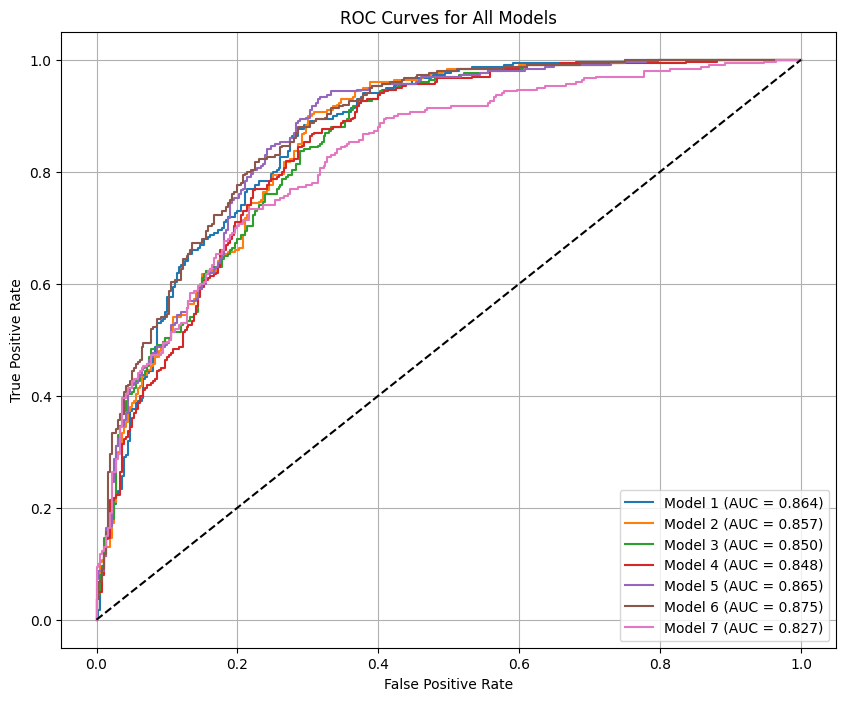

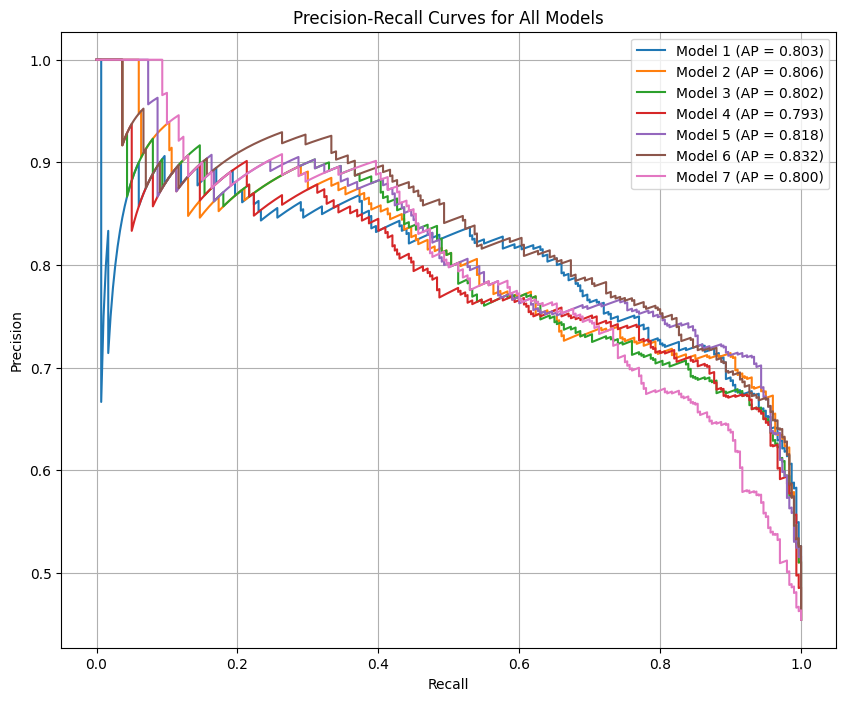

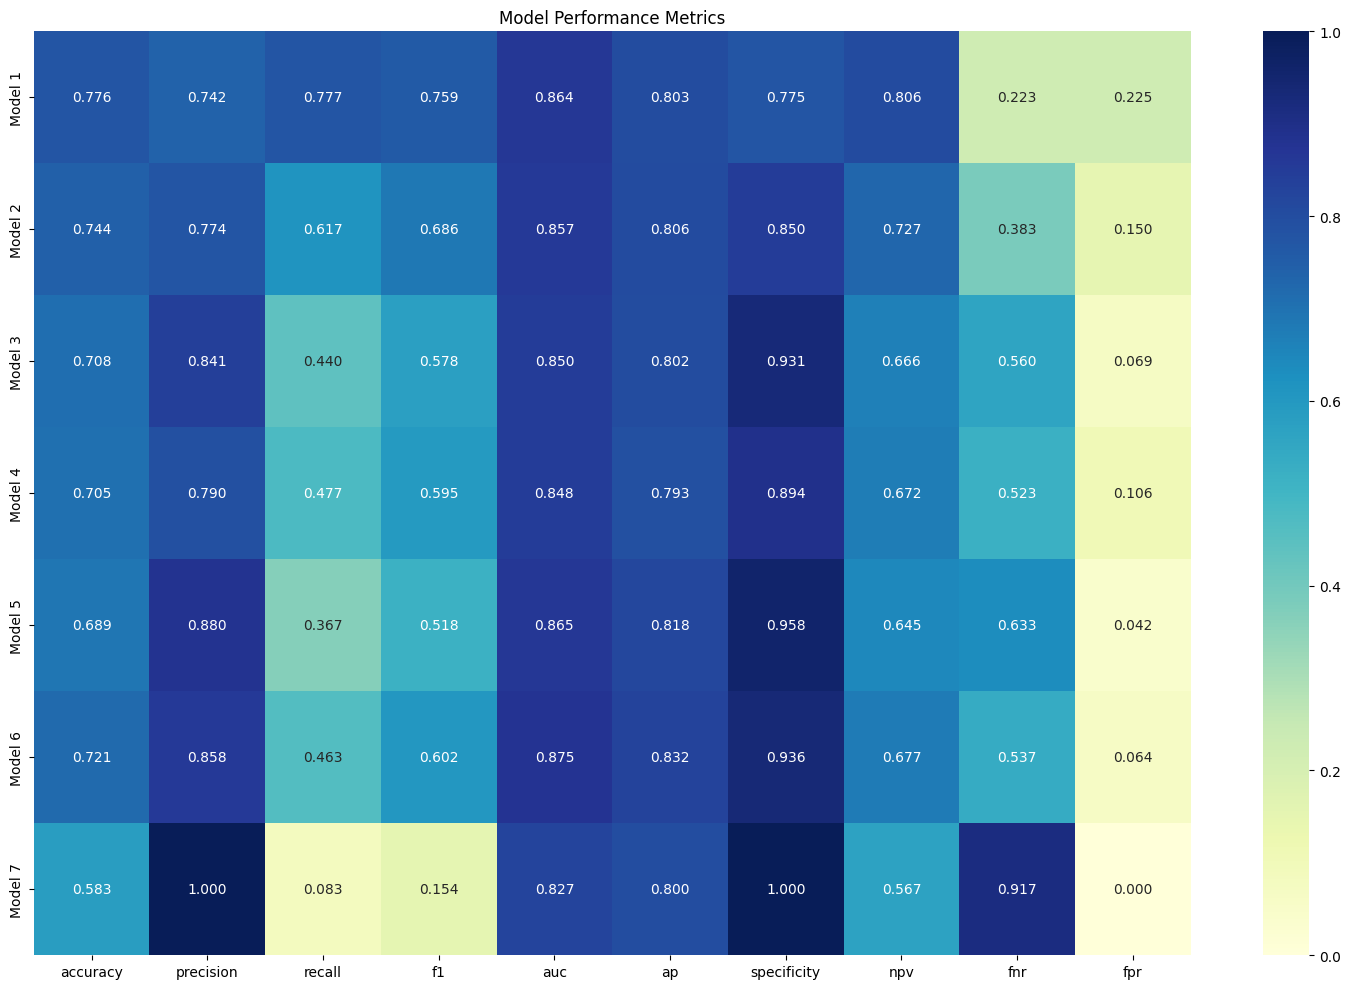

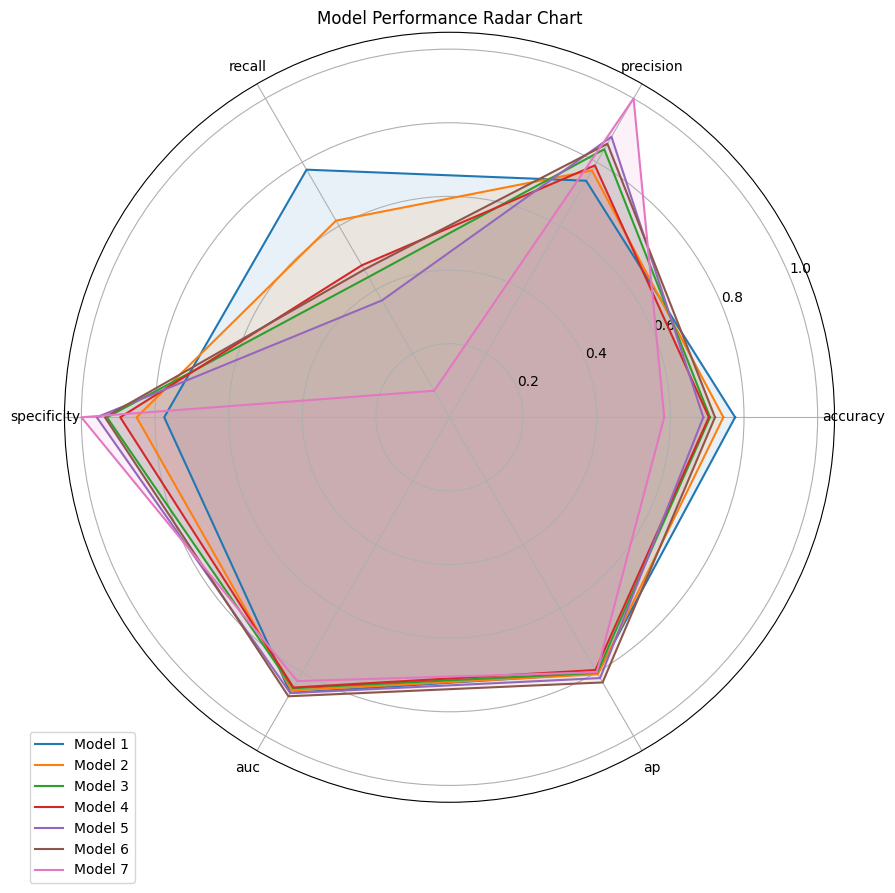


Overall Results and Best Models:

ACCURACY:
Average: 0.7037 ± 0.0558
Best Model: Model 1 (0.7758)
Model Ranking: [1 2 6 3 4 5 7]

PRECISION:
Average: 0.8407 ± 0.0792
Best Model: Model 7 (1.0000)
Model Ranking: [7 5 6 3 4 2 1]

RECALL:
Average: 0.4605 ± 0.1986
Best Model: Model 1 (0.7767)
Model Ranking: [1 2 4 6 3 5 7]

F1:
Average: 0.5558 ± 0.1795
Best Model: Model 1 (0.7590)
Model Ranking: [1 2 6 4 3 5 7]

AUC:
Average: 0.8552 ± 0.0143
Best Model: Model 6 (0.8751)
Model Ranking: [6 5 1 2 3 4 7]

AP:
Average: 0.8077 ± 0.0121
Best Model: Model 6 (0.8318)
Model Ranking: [6 5 2 1 3 7 4]

SPECIFICITY:
Average: 0.9063 ± 0.0692
Best Model: Model 7 (1.0000)
Model Ranking: [7 5 6 3 4 2 1]

NPV:
Average: 0.6800 ± 0.0681
Best Model: Model 1 (0.8064)
Model Ranking: [1 2 6 4 3 5 7]

FNR:
Average: 0.5395 ± 0.1986
Best Model: Model 7 (0.9167)
Model Ranking: [7 5 3 6 4 2 1]

FPR:
Average: 0.0937 ± 0.0692
Best Model: Model 1 (0.2250)
Model Ranking: [1 2 4 3 6 5 7]

Model Stability (lower is better):


In [ ]:
# Organize all metrics into a summary DataFrame
metrics_df = pd.DataFrame(model_metrics, index=[f'Model {i}' for i in range(1, 8)])
print("\nComprehensive Metrics Summary:")
print(metrics_df)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for i, (fpr, tpr) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'Model {i+1} (AUC = {model_metrics["auc"][i]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for i, (precision, recall) in enumerate(pr_curves):
    plt.plot(recall, precision, label=f'Model {i+1} (AP = {model_metrics["ap"][i]:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

# Create a heatmap of the metrics
plt.figure(figsize=(15, 10))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f', vmin=0, vmax=1)
plt.title('Model Performance Metrics')
plt.tight_layout()
plt.show()

# Create a radar chart for comparing models
metrics_for_radar = ['accuracy', 'precision', 'recall', 'specificity', 'auc', 'ap']
radar_data = metrics_df[metrics_for_radar].values

angles = np.linspace(0, 2*np.pi, len(metrics_for_radar), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
for i in range(7):
    values = np.concatenate((radar_data[i], [radar_data[i][0]]))
    ax.plot(angles, values, label=f'Model {i+1}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], metrics_for_radar)
plt.title('Model Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# Print overall results and best models
print("\nOverall Results and Best Models:")
for metric in model_metrics:
    mean_score = np.mean(model_metrics[metric])
    std_score = np.std(model_metrics[metric])
    best_model = np.argmax(model_metrics[metric]) + 1
    print(f"\n{metric.upper()}:")
    print(f"Average: {mean_score:.4f} ± {std_score:.4f}")
    print(f"Best Model: Model {best_model} ({model_metrics[metric][best_model-1]:.4f})")
    print(f"Model Ranking: {np.argsort(model_metrics[metric])[::-1] + 1}")

# Calculate and print model stability (variance across metrics)
model_stability = metrics_df.std(axis=1)
print("\nModel Stability (lower is better):")
print(model_stability)